# HRRR Point Forecasts
It is often helpful to view the HRRR forecasts at a single point over time. These methods pluck from the grid a single point, iterated over time or over forecast hours.

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
import numpy as np
import matplotlib as mpl
import matplotlib.dates as mdates

In [81]:
import sys
sys.path.append('/uufs/chpc.utah.edu/common/home/u0553130/pyBKB_v2')
from BB_downloads.HRRR_S3 import get_hrrr_hovmoller, get_hrrr_pollywog_multi, point_hrrr_time_series_multi
from BB_MesoWest.MesoWest_timeseries import get_mesowest_ts
from BB_MesoWest.MesoWest_STNinfo import get_MW_location_dict
from matplotlib.dates import DateFormatter, HourLocator
from BB_wx_calcs.wind import wind_uv_to_spd

## Hovmoller Forecasts
These are not real Hovemoller diagrams, but it is a similar principle--plot two dimensions on a plot. In this case, the two dimension are the forecast valid time (x axis) and the forecast lead time (y axis).

In [3]:
# Set Date Range
sDATE = datetime(2017, 10, 8, 15)
eDATE = datetime(2017, 10, 9, 15)

# Set HRRR variable
var = 'WIND:10 m'

# Specify a location dictionary: {'name':{'latitude':,'longitude':}}
# Create location dictionary from a MesoWest ID
STID = 'HWKC1'
LD = get_MW_location_dict(STID)

In [5]:
# Get the hovemoller data
hovmoller = get_hrrr_hovmoller(sDATE, eDATE, LD,
                               variable=var,
                               area_stats=False)

finished multiprocessing in 0:00:04.276081 on 22 processers
finished multiprocessing in 0:00:04.262694 on 22 processers
finished multiprocessing in 0:00:04.449268 on 22 processers
finished multiprocessing in 0:00:03.625680 on 22 processers
finished multiprocessing in 0:00:03.455288 on 22 processers
finished multiprocessing in 0:00:03.471697 on 22 processers
finished multiprocessing in 0:00:04.138464 on 22 processers
finished multiprocessing in 0:00:04.405465 on 22 processers
finished multiprocessing in 0:00:03.825629 on 22 processers
finished multiprocessing in 0:00:04.113329 on 22 processers
finished multiprocessing in 0:00:04.300947 on 22 processers
finished multiprocessing in 0:00:03.914567 on 22 processers
finished multiprocessing in 0:00:04.284905 on 22 processers
finished multiprocessing in 0:00:04.019780 on 22 processers
finished multiprocessing in 0:00:03.940590 on 22 processers
finished multiprocessing in 0:00:03.805305 on 22 processers
finished multiprocessing in 0:00:03.8854

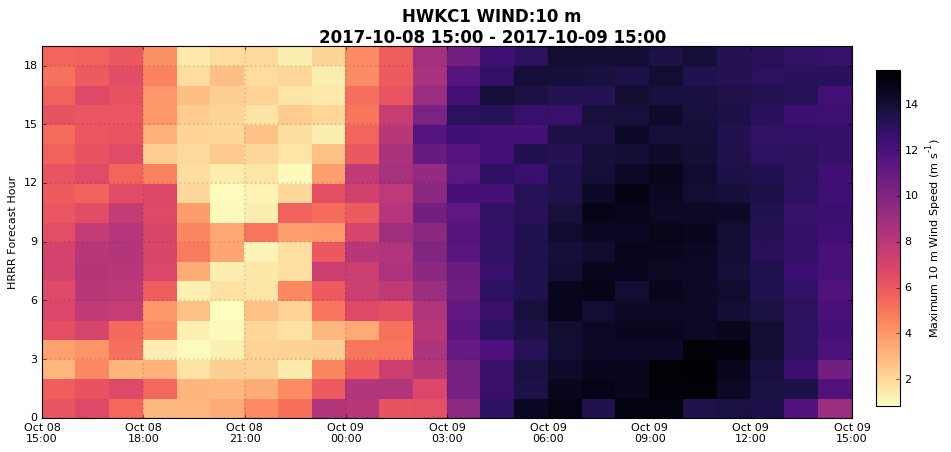

In [6]:
## Reset the defaults (see more here: http://matplotlib.org/users/customizing.html)
mpl.rcParams['figure.figsize'] = [15, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.01
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
fig = plt.figure(1)
ax1 = plt.subplot(111)

plt.suptitle('%s %s\n%s - %s' % \
            (STID,
             var,
             sDATE.strftime('%Y-%m-%d %H:%M'),
             eDATE.strftime('%Y-%m-%d %H:%M')))

# HRRR Hovmoller Plot
hv = ax1.pcolormesh(hovmoller['valid_1d+'],
                    hovmoller['fxx_1d+'],
                    hovmoller[STID],
                    cmap='magma_r')

ax1.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
ax1.set_ylim(0, 19)
ax1.set_yticks(range(0, 19, 3))
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('HRRR Forecast Hour')

ax1.grid()

fig.subplots_adjust(hspace=0, right=0.8)

cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cb = fig.colorbar(hv, cax=cbar_ax)
cb.ax.set_ylabel(r'Maximum 10 m Wind Speed (m s$\mathregular{^{-1}}$)')

ax1.xaxis.set_major_locator(HourLocator(byhour=range(0,24,3)))
dateFmt = DateFormatter('%b %d\n%H:%M')
ax1.xaxis.set_major_formatter(dateFmt)

## Hovmoller with MesoWest Station
Direct comparison of HRRR point forecasts with MesoWest station observations.

In [7]:
# Get MesoWest observations from station
a = get_mesowest_ts(STID, sDATE-timedelta(hours=6), eDATE+timedelta(hours=6), variables='wind_speed')

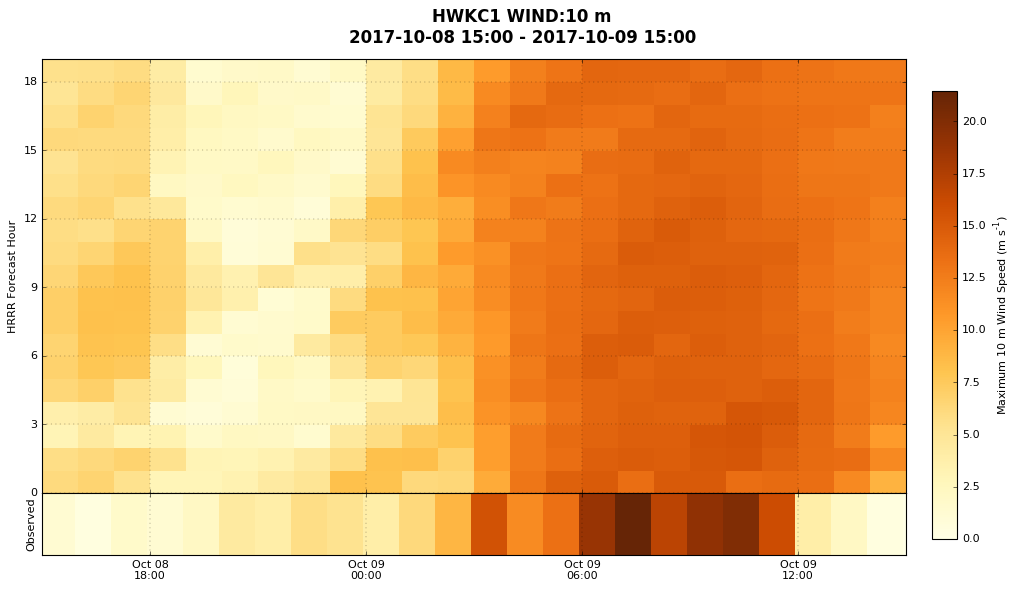

In [8]:
## Reset the defaults (see more here: http://matplotlib.org/users/customizing.html)
mpl.rcParams['figure.figsize'] = [16, 8]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.01
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

# Plot the Hovmoller diagram
fig = plt.figure(1)
ax1 = plt.subplot2grid((8, 1), (0, 0), rowspan=7)
ax2 = plt.subplot(8, 1, 8)
#
plt.suptitle('%s %s\n%s - %s' % \
    (STID, var,
     sDATE.strftime('%Y-%m-%d %H:%M'),\
     eDATE.strftime('%Y-%m-%d %H:%M')))
#
hmax = np.nanmax([np.nanmax(hovmoller[STID]), np.nanmax(a['wind_speed'])])
hmin = 0
cmap = 'YlOrBr'
#
# HRRR Hovmoller (tall subplot on top)
hv = ax1.pcolormesh(hovmoller['valid_1d+'],
                    hovmoller['fxx_1d+'],
                    hovmoller[STID],
                    cmap=cmap,
                    vmax=hmax,
                    vmin=hmin)
ax1.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
ax1.set_ylim(0, 19)
ax1.set_yticks(range(0, 19, 3))
ax1.axes.xaxis.set_ticklabels([])
ax1.set_ylabel('HRRR Forecast Hour')
#
# Observed mesh (thin subplot on bottom)
mw = ax2.pcolormesh(a['DATETIME'],
                    range(3),
                    [a['wind_speed'], a['wind_speed']], # just becuasee we need a 2d array of the observations...
                    cmap=cmap,
                    vmax=hmax,
                    vmin=hmin)

ax2.axes.yaxis.set_ticklabels([])
ax2.set_yticks([])
ax2.set_ylabel('Observed')
ax2.set_xlim(hovmoller['valid_1d+'][0], hovmoller['valid_1d+'][-1])
                                        
#
ax1.grid()
ax2.grid()
#
fig.subplots_adjust(hspace=0, right=0.8)
cbar_ax = fig.add_axes([0.82, 0.15, 0.02, 0.7])
cb = fig.colorbar(hv, cax=cbar_ax)
cb.ax.set_ylabel(r'Maximum 10 m Wind Speed (m s$\mathregular{^{-1}}$)')
#
ax1.xaxis.set_major_locator(HourLocator(byhour=[0, 6, 12, 18]))
ax2.xaxis.set_major_locator(HourLocator(byhour=[0, 6, 12, 18]))
dateFmt = DateFormatter('%b %d\n%H:%M')
ax2.xaxis.set_major_formatter(dateFmt)

## Forecast Time Series
Orginated from "project golf" http://home.chpc.utah.edu/~u0553130/oper/HRRR_golf/Oaks/photo_viewer2.php  
Displays value of variable between f00-f18

In [50]:
# Specify the model initialization date
initDATE = datetime(2017, 3, 23, 15)

# Specify the location
STID = 'KSLC'
LD = get_MW_location_dict(STID)

# Get Data
timer = datetime.now()
P_temp = get_hrrr_pollywog_multi(initDATE, 'TMP:2 m', LD, verbose=False); print "got Temp"
P_dwpt = get_hrrr_pollywog_multi(initDATE, 'DPT:2 m', LD, verbose=False); print "got Dwpt"
P_wind = get_hrrr_pollywog_multi(initDATE, 'WIND:10 m', LD, verbose=False); print "got Wind"
P_gust = get_hrrr_pollywog_multi(initDATE, 'GUST:surface', LD, verbose=False); print "got Gust"
P_u = get_hrrr_pollywog_multi(initDATE, 'UGRD:10 m', LD, verbose=False); print "got U10"
P_v = get_hrrr_pollywog_multi(initDATE, 'VGRD:10 m', LD, verbose=False); print "got V10"
P_prec = get_hrrr_pollywog_multi(initDATE, 'APCP:surface', LD, verbose=False); print "got Precip"
P_accum = {} # Accumulated precip

# Convert the units of each Pollywog and each location
for loc in LD.keys():
    # Convert Units for the variables in the Pollywog
    P_temp[loc] = P_temp[loc]-273.15
    P_dwpt[loc] = P_dwpt[loc]-273.15
    P_accum[loc] = np.add.accumulate(P_prec[loc]) # Accumulated Precip
    
print "Timer:", datetime.now()-timer

got Temp
got Dwpt
got Wind
got Gust
got U10
got V10
got Precip
Timer: 0:03:37.455307


In [51]:
# Get MesoWest observations
# Get MesoWest observations from station
a = get_mesowest_ts(STID, initDATE-timedelta(hours=1), initDATE+timedelta(hours=20), variables='wind_speed,air_temp,dew_point_temperature')

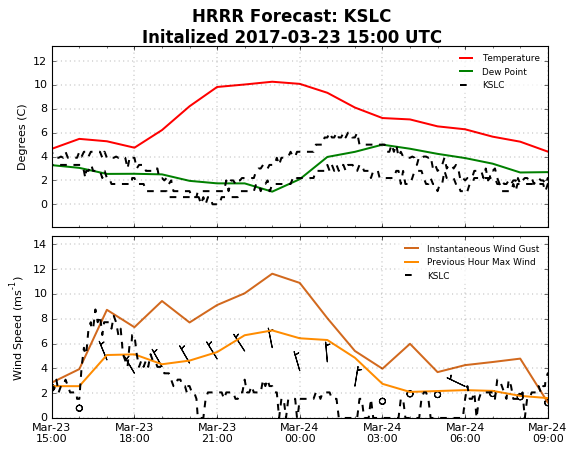

In [52]:
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

fig, [ax1, ax2] = plt.subplots(nrows=2, ncols=1)

# Temperature and Dew Point Graph
plt.sca(ax1)
ax1.plot(P_temp['DATETIME'], P_temp[STID], c='r', label='Temperature')
ax1.plot(P_dwpt['DATETIME'], P_dwpt[STID], c='g', label='Dew Point')
ax1.plot(a['DATETIME'], a['air_temp'], c='k', linestyle='--', label=STID)
ax1.plot(a['DATETIME'], a['dew_point_temperature'], c='k', linestyle='--')
leg2 = ax1.legend()
leg2.get_frame().set_linewidth(0)
ax1.grid()
ax1.set_ylabel('Degrees (C)')
ax1.set_xlim([P_temp['DATETIME'][0], P_temp['DATETIME'][-1]])
ax1.set_ylim([np.nanmin(P_dwpt[STID])-3, np.nanmax(P_temp[STID])+3])
ax1.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax1.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter(''))

# Wind
plt.sca(ax2)
ax2.plot(P_gust['DATETIME'], P_gust[STID], c='chocolate', label='Instantaneous Wind Gust')
ax2.plot(P_wind['DATETIME'], P_wind[STID], c='darkorange', label='Previous Hour Max Wind')
ax2.plot(a['DATETIME'], a['wind_speed'], c='k', linestyle='--', label=STID)

# plt.barbs can not take a datetime object, so find the date indexes:
idx = mpl.dates.date2num(P_u['DATETIME'])
ax2.barbs(idx, wind_uv_to_spd(P_u[STID], P_v[STID]), P_u[STID], P_v[STID],
                       length=6,
                       barb_increments=dict(half=5, full=10, flag=50))
leg3 = ax2.legend()
leg3.get_frame().set_linewidth(0)
ax2.grid()
ax2.set_ylabel(r'Wind Speed (ms$\mathregular{^{-1}}$)')
ax2.set_ylim([0, np.nanmax(P_gust[STID])+3])
ax2.set_yticks([0, np.nanmax(P_gust[STID])+3], 2.5)
ax2.set_xlim([P_gust['DATETIME'][0], P_gust['DATETIME'][-1]])
ax2.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax2.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter(''))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d\n%H:%M'))
"""
# Precipitation
plt.sca(ax3)
ax3.bar(P_prec['DATETIME'], P_prec[STID], width=.04, color='dodgerblue', label='1 hour Precipitation')
ax3.plot(P_prec['DATETIME'], P_accum[STID], color='limegreen', label='Accumulated Precipitation')
ax3.set_xlim([P_prec['DATETIME'][0], P_prec['DATETIME'][-1]])
ax3.set_ylim([0, np.nanmax(P_accum[STID])+.1])
ax3.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax3.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d\n%H:%M'))
leg4 = ax3.legend()
leg4.get_frame().set_linewidth(0)
ax3.grid()
ax3.set_ylabel('Precipitation (mm)')
"""

# Plot Info
plt.suptitle('HRRR Forecast: %s\nInitalized %s' % (STID, P_temp['DATETIME'][0].strftime('%Y-%m-%d %H:%M UTC')))

#### With Accumulated Precipitation

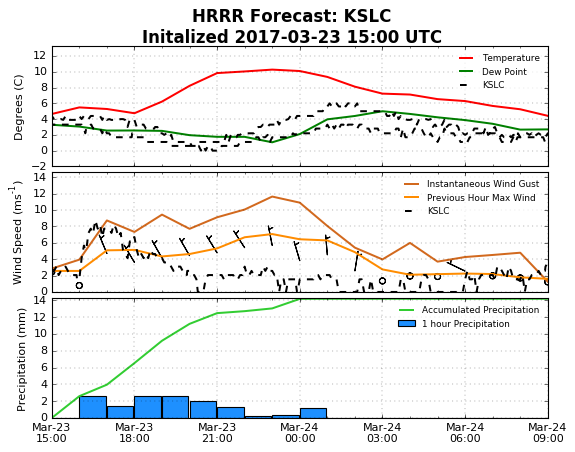

In [53]:
mpl.rcParams['figure.figsize'] = [8, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

fig, [ax1, ax2, ax3] = plt.subplots(nrows=3, ncols=1)

# Temperature and Dew Point Graph
plt.sca(ax1)
ax1.plot(P_temp['DATETIME'], P_temp[STID], c='r', label='Temperature')
ax1.plot(P_dwpt['DATETIME'], P_dwpt[STID], c='g', label='Dew Point')
ax1.plot(a['DATETIME'], a['air_temp'], c='k', linestyle='--', label=STID)
ax1.plot(a['DATETIME'], a['dew_point_temperature'], c='k', linestyle='--')
leg2 = ax1.legend()
leg2.get_frame().set_linewidth(0)
ax1.grid()
ax1.set_ylabel('Degrees (C)')
ax1.set_xlim([P_temp['DATETIME'][0], P_temp['DATETIME'][-1]])
ax1.set_ylim([np.nanmin(P_dwpt[STID])-3, np.nanmax(P_temp[STID])+3])
ax1.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax1.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax1.xaxis.set_major_formatter(mdates.DateFormatter(''))

# Wind
plt.sca(ax2)
ax2.plot(P_gust['DATETIME'], P_gust[STID], c='chocolate', label='Instantaneous Wind Gust')
ax2.plot(P_wind['DATETIME'], P_wind[STID], c='darkorange', label='Previous Hour Max Wind')
ax2.plot(a['DATETIME'], a['wind_speed'], c='k', linestyle='--', label=STID)

# plt.barbs can not take a datetime object, so find the date indexes:
idx = mpl.dates.date2num(P_u['DATETIME'])
ax2.barbs(idx, wind_uv_to_spd(P_u[STID], P_v[STID]), P_u[STID], P_v[STID],
                       length=6,
                       barb_increments=dict(half=5, full=10, flag=50))
leg3 = ax2.legend()
leg3.get_frame().set_linewidth(0)
ax2.grid()
ax2.set_ylabel(r'Wind Speed (ms$\mathregular{^{-1}}$)')
ax2.set_ylim([0, np.nanmax(P_gust[STID])+3])
ax2.set_yticks([0, np.nanmax(P_gust[STID])+3], 2.5)
ax2.set_xlim([P_gust['DATETIME'][0], P_gust['DATETIME'][-1]])
ax2.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax2.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax2.xaxis.set_major_formatter(mdates.DateFormatter(''))

# Precipitation
plt.sca(ax3)
ax3.bar(P_prec['DATETIME'], P_prec[STID], width=.04, color='dodgerblue', label='1 hour Precipitation')
ax3.plot(P_prec['DATETIME'], P_accum[STID], color='limegreen', label='Accumulated Precipitation')
ax3.set_xlim([P_prec['DATETIME'][0], P_prec['DATETIME'][-1]])
ax3.set_ylim([0, np.nanmax(P_accum[STID])+.1])
ax3.xaxis.set_major_locator(mdates.HourLocator(range(0, 24, 3)))
ax3.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 1)))
ax3.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d\n%H:%M'))
leg4 = ax3.legend()
leg4.get_frame().set_linewidth(0)
ax3.grid()
ax3.set_ylabel('Precipitation (mm)')


# Plot Info
plt.suptitle('HRRR Forecast: %s\nInitalized %s' % (STID, P_temp['DATETIME'][0].strftime('%Y-%m-%d %H:%M UTC')))

# Pollywogs
These take awhile to make  
John Horel named these pollywogs because when you plot the series of a forecast variable with the analysis hour being a circle, the lines look like pollywogs   O----

got head 2017-04-04 12:00:00
Got pollywog 2017-04-05 00:00:00
got head 2017-04-05 00:00:00
got head 2017-04-05 12:00:00
Got pollywog 2017-04-06 00:00:00
got head 2017-04-06 00:00:00


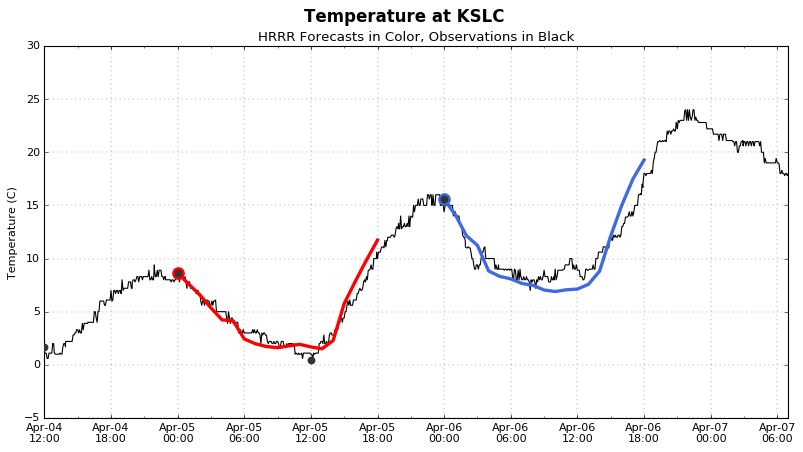

In [82]:
mpl.rcParams['figure.figsize'] = [12, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

# Set Date Range
sDATE = datetime(2017, 4, 4, 12)
eDATE = datetime(2017, 4, 6, 12)

# Station
STID = 'KSLC'
LD = get_MW_location_dict(STID)

# Pollywog hours: a list of hours you want a pollywog to spawn
pHours = range(0, 24, 24)

# Head hours: a list of hours you want to plot a pollywog head (analysis value)
hHours = range(0, 24, 12)

# Variable names for HRRR and MesoWest
HR_var = 'TMP:2 m'
MW_var = 'air_temp'

#=====================================================================

# Create hourly range
hours = (eDATE-sDATE).days * 24 + (eDATE-sDATE).seconds/3600
DATES = np.array([sDATE + timedelta(hours=x) for x in range(0, hours)])

# Cycle pollywogs through these colors.
colors = ['red', 'royalblue', 'green', 'darkorange'] * 50

color_count = 0

# Create the plot
fig, ax = plt.subplots(1)

# Get MesoWest data
a = get_mesowest_ts(STID, sDATE, eDATE+timedelta(hours=20), variables=MW_var)

# Plot the MesoWest data
plt.plot(a['DATETIME'], a[MW_var], c='k', lw=1, zorder=1)

for D in DATES:
    if D.hour in pHours:
        # Get full pollywog for each hour requested
        P = get_hrrr_pollywog_multi(D, HR_var, LD, verbose=False); print 'Got pollywog', D
        
        # Convert units if necessary
        if MW_var == 'air_temp':
            P_value = P[STID]-273.15
        if MW_var == 'sea_level_pressure':
            P_value = P[STID]/100

        # Plot the HRRR pollywog
        # Head
        plt.scatter(P['DATETIME'][0], P_value[0], c=colors[color_count], s=130, lw=0, zorder=2)
        # Tail
        plt.plot(P['DATETIME'], P_value, c=colors[color_count], lw=3, zorder=2)
        color_count += 1
        
    if D.hour in hHours:
        # Plot the HRRR data point grey. Have to redownload P just in case it doesn't exist already
        P = get_hrrr_pollywog_multi(D, HR_var, LD, forecast_limit=0, verbose=False); print "got head", D
        
        # Convert units if necessary
        if MW_var == 'air_temp':
            P_value = P[STID]-273.15
        if MW_var == 'sea_level_pressure':
            P_value = P[STID]/100
        plt.scatter(P['DATETIME'][0], P_value[0], c=[.2, .2, .2], s=50, lw=0, zorder=3)

# Figure Cosmetics
if MW_var == 'air_temp':
    plt.suptitle('Temperature at %s' % (STID))
    plt.ylabel('Temperature (C)')
elif MW_var == 'wind_speed':
    plt.suptitle('Wind Speed at %s' % (STID))
    plt.ylabel(r'Wind Speed (m s$\mathregular{^{-1}}$)')
elif MW_var == 'wind_gust':
    plt.suptitle('Wind Gust at %s' % (STID))
    plt.ylabel(r'Wind Gust (m s$\mathregular{^{-1}}$)')
elif MW_var == 'sea_level_pressure':
    plt.suptitle('Sea Level Pressure at %s' % (STID))
    plt.ylabel('Pressure (hPa)')
plt.title('HRRR Forecasts in Color, Observations in Black')
ax.set_xlim([DATES[0], DATES[-1]+timedelta(hours=20)])
plt.grid()
ax.xaxis.set_major_locator(mdates.HourLocator([0, 6, 12, 18]))
ax.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 3)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d\n%H:%M'))

# fxx Time Series
Sometimes you simply need to see the analysis over time, or a certain forecast hour over time

finished multiprocessing in 0:00:13.195430 on 22 processers
finished multiprocessing in 0:00:13.889745 on 22 processers


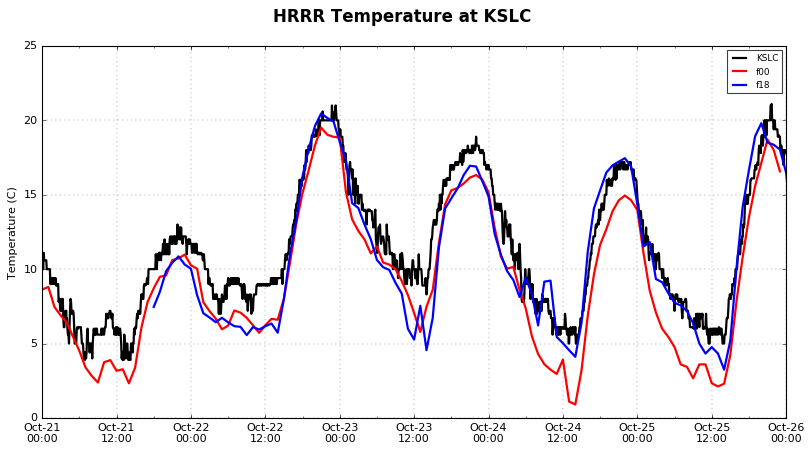

In [94]:
mpl.rcParams['figure.figsize'] = [12, 6]
mpl.rcParams['figure.titlesize'] = 15
mpl.rcParams['figure.titleweight'] = 'bold'
mpl.rcParams['xtick.labelsize'] = 10
mpl.rcParams['ytick.labelsize'] = 10
mpl.rcParams['axes.labelsize'] = 10
mpl.rcParams['axes.titlesize'] = 12
mpl.rcParams['lines.linewidth'] = 1.8
mpl.rcParams['grid.linewidth'] = .25
mpl.rcParams['figure.subplot.wspace'] = 0.05
mpl.rcParams['figure.subplot.hspace'] = 0.05
mpl.rcParams['legend.fontsize'] = 8
mpl.rcParams['legend.framealpha'] = .75
mpl.rcParams['legend.loc'] = 'best'
mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 100
mpl.rcParams['savefig.transparent'] = False

# Date Range
sDATE = datetime(2017, 10, 21)
eDATE = datetime(2017, 10, 26)

# Location
STID = 'KSLC'
LD = get_MW_location_dict(STID)

# Variable names for HRRR and MesoWest
HR_var = 'TMP:2 m'
MW_var = 'air_temp'

# Get a HRRR time series for fxx=0
TS00 = point_hrrr_time_series_multi(sDATE, eDATE, LD,
                                    variable=HR_var,
                                    fxx=0, model='hrrr', field='sfc',
                                    area_stats=False,
                                    reduce_CPUs=2,
                                    verbose=False)

# Get a HRRR time series for fxx=18
TS18 = point_hrrr_time_series_multi(sDATE, eDATE, LD,
                                    variable=HR_var,
                                    fxx=18, model='hrrr', field='sfc',
                                    area_stats=False,
                                    reduce_CPUs=2,
                                    verbose=False)

# Get a MesoWest time series
a = get_mesowest_ts(STID, sDATE, eDATE, variables=MW_var)

# =======================================================================

fig, ax = plt.subplots(1)

# Plot the MesoWest data
plt.plot(a['DATETIME'], a[MW_var], c='k', lw=2, zorder=1, label=STID)

# Plot the HRRR data
plt.plot(TS00['DATETIME'], TS00[STID]-273.5, c='r', lw=2, label='f00')
plt.plot(TS18['DATETIME'], TS18[STID]-273.5, c='b', lw=2, label='f18')

plt.legend()
plt.grid()
plt.suptitle('HRRR Temperature at %s' % STID)
plt.ylabel('Temperature (C)')

ax.set_xlim([sDATE, eDATE])
ax.xaxis.set_major_locator(mdates.HourLocator([0, 12]))
ax.xaxis.set_minor_locator(mdates.HourLocator(range(0, 24, 6)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b-%d\n%H:%M'))